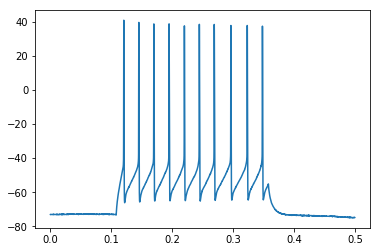

In [29]:
import matplotlib.pyplot as plt
import pyabf
import seaborn as sns
from scipy.signal import find_peaks
import numpy as np
filepath = '/Volumes/brain_slice/Tsai/04-15-19_PV-cre-tdTOM-GCaM6f_P52/t041519c_PV_0001.abf'
abf = pyabf.ABF(filepath)
abf.setSweep(1)
plt.plot(abf.sweepX, abf.sweepY)
plt.show()




#'/Volumes/brain_slice/Tsai/03-27-19_PV-cre-tdTOM-Cheata_P75/t032719a_PV_0003.abf'

In [4]:
print(abf)

NameError: name 'abf' is not defined

In [84]:
print(abf.headerText) # display header information in the console
abf.headerLaunch()


### ABF Class Methods ###
abf.launchInClampFit()
abf.saveABF1()
abf.setSweep()
abf.sweepD()

### ABF Class Variables ###
abfDateTime = 2019-03-27 17:26:28.582000
abfDateTimeString = 2019-03-27T17:26:28.582
abfFileComment =
abfFilePath = /Volumes/brain_slice/Tsai/03-27-19_PV-cre-tdTOM-Cheata_P75/t032719a_PV_0003.abf
abfID = t032719a_PV_0003
abfVersion = {'major': 2, 'minor': 5, 'bugfix': 0, 'build': 0}
abfVersionString = 2.5.0.0
adcNames = ['IN 0']
adcUnits = ['mV']
channelCount = 1
channelList = [0]
creatorVersion = {'major': 10, 'minor': 5, 'bugfix': 2, 'build': 6}
creatorVersionString = 10.5.2.6
dacNames = ['Cmd 0']
dacUnits = ['pA']
data = [[-75.5005 -75.47   -75.47   ... -77.8503 -77.8503 -77.9114]]
dataByteStart = 6656
dataLengthMin = 7.091666666666667
dataLengthSec = 425.5
dataPointByteSize = 2
dataPointCount = 425000
dataPointsPerMs = 10
dataRate = 10000
dataSecPerPoint = 0.0001
fileGUID = {4A674563-98C6-4ADC-BD9B-B576A1513E3E}
holdingCommand = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

In [281]:
abf.headerText

/anaconda3/lib/python3.7/site-packages/pyabf/abfHeaderDisplay.py:83: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if value == "~SECTION~":
/anaconda3/lib/python3.7/site-packages/pyabf/abfHeaderDisplay.py:85: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif value == "~DOCS~":


'\n### ABF Class Methods ###\nabf.launchInClampFit()\nabf.saveABF1()\nabf.setSweep()\nabf.sweepD()\n\n### ABF Class Variables ###\nabfDateTime = 2019-03-27 17:26:28.582000\nabfDateTimeString = 2019-03-27T17:26:28.582\nabfFileComment =\nabfFilePath = /Volumes/brain_slice/Tsai/03-27-19_PV-cre-tdTOM-Cheata_P75/t032719a_PV_0003.abf\nabfID = t032719a_PV_0003\nabfVersion = {\'major\': 2, \'minor\': 5, \'bugfix\': 0, \'build\': 0}\nabfVersionString = 2.5.0.0\nadcNames = [\'IN 0\']\nadcUnits = [\'mV\']\nchannelCount = 1\nchannelList = [0]\ncreatorVersion = {\'major\': 10, \'minor\': 5, \'bugfix\': 2, \'build\': 6}\ncreatorVersionString = 10.5.2.6\ndacNames = [\'Cmd 0\']\ndacUnits = [\'pA\']\ndata = [[-75.5005 -75.47   -75.47   ... -77.8503 -77.8503 -77.9114]]\ndataByteStart = 6656\ndataLengthMin = 7.091666666666667\ndataLengthSec = 425.5\ndataPointByteSize = 2\ndataPointCount = 425000\ndataPointsPerMs = 10\ndataRate = 10000\ndataSecPerPoint = 0.0001\nfileGUID = {4A674563-98C6-4ADC-BD9B-B576A15

In [85]:
abf.channelCount

1

In [30]:
y = []
#opto = []
for sweep in abf.sweepList:
    abf.setSweep(sweep,channel=0)
    y.append(abf.sweepY)
    #abf.setSweep(sweep,channel=1)
    #opto.append(abf.sweepY)
y = np.stack(y)
#opto = np.stack(opto)
x = abf.sweepX

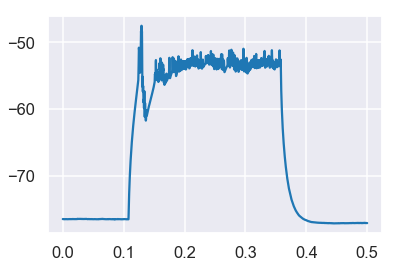

In [39]:
meansweep = np.array(y).mean(axis = 0)
plt.plot(abf.sweepX, meansweep)


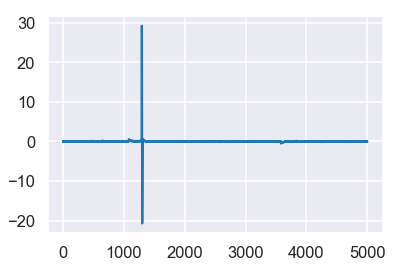

In [271]:
#find spikes method 1
dydx = np.gradient(y,axis = 1)
plt.plot(dydx[1])

In [31]:
#find spike method 2 -> better
Spikes = []
for sweep in abf.sweepList:
    abf.setSweep(sweep,channel=0)
    peak_time, _ = find_peaks(abf.sweepY, height=0)
    Spikes.append(peak_time)
       


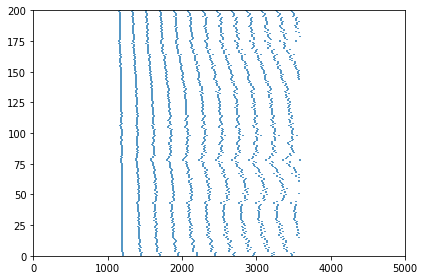

In [34]:
# rastor plot
plt.eventplot(Spikes)
plt.ylim((0,200))
plt.xlim((0,5000))
plt.tight_layout()

In [151]:
properties["peak_heights"]

array([41.8701])

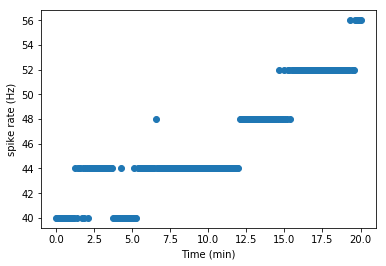

In [33]:
# allocate numbers of spikes in each sweep
SpikeNumber = []
for i in abf.sweepList:
    spkn = len(Spikes[i])
    SpikeNumber.append(spkn*4)

    
xi = [i for i in np.linspace(0, len(SpikeNumber)*5/60,len(SpikeNumber))]
plt.ylabel("spike rate (Hz)")
plt.xlabel("Time (min)")
plt.plot(xi,SpikeNumber,"o")


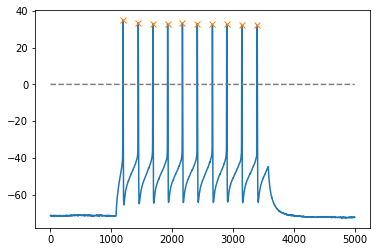

In [12]:
#ploting spike detection
plt.plot(y[81])
plt.plot(Spikes[81], y[81,Spikes[81]], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

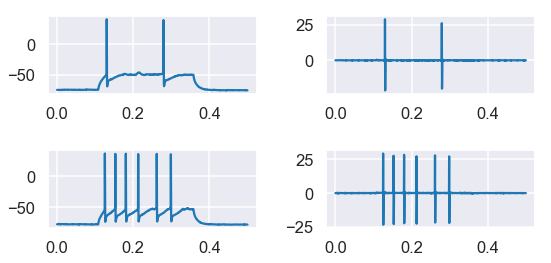

In [277]:
#another way to see spikes s

f, ax = plt.subplots(2,2,figsize = (8,4))
ax[0,0].plot(x,y[5])
ax[1,0].plot(x,y[83])

ax[0,1].plot(x,dydx[5])
ax[1,1].plot(x,dydx[83])

plt.tight_layout()
#ax[1].plot(x,opto[0,:])

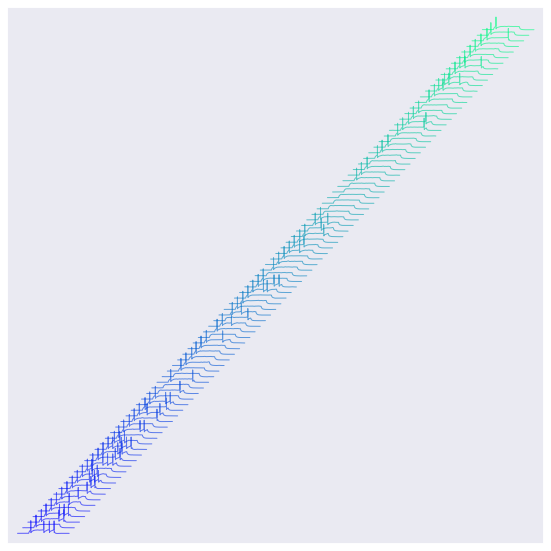

In [262]:
# use a custom colormap
cm = plt.get_cmap("winter")
colors = [cm(x/abf.sweepCount) for x in abf.sweepList]

plt.figure(figsize=(8,8))
for sweepNumber in abf.sweepList:
    plt.plot(
        x + .05 * sweepNumber,
        y[sweepNumber,:] + 50*sweepNumber,
        color=colors[sweepNumber],
        lw=1, alpha=.6)
#     plt.plot(
#         abf.sweepX[i1:i2] + 0 * sweepNumber,
#         abf.sweepY[i1:i2] + 10*sweepNumber,
#         color=colors[sweepNumber],
#         lw=.5, alpha=.6)

# remove axes and use tight margins
plt.gca().get_yaxis().set_visible(False)  # hide Y axis
plt.gca().get_xaxis().set_visible(False)  # hide X axis
plt.margins(.02, .02)
plt.tight_layout()

plt.show()

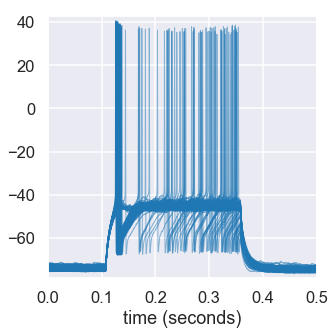

In [263]:
sns.set_context('talk')
sns.set_style('darkgrid')
f, ax = plt.subplots(1,1,figsize=(5, 5), sharey = True)

file = 0
for sweepNum in abf.sweepList:
    abf.setSweep(sweepNum)
    ax.plot(abf.sweepX, abf.sweepY,
             color='C0', lw=1, alpha = 0.5)

#     ax.set_xlim([0.1078,0.1084])
# ax.set_ylim([-600,600])
plt.xlabel(abf.sweepLabelX)
plt.xlim((0,0.5))
plt.margins(0, .02)
plt.tight_layout()

In [298]:
%matplotlib qt

<IPython.core.display.Javascript object>


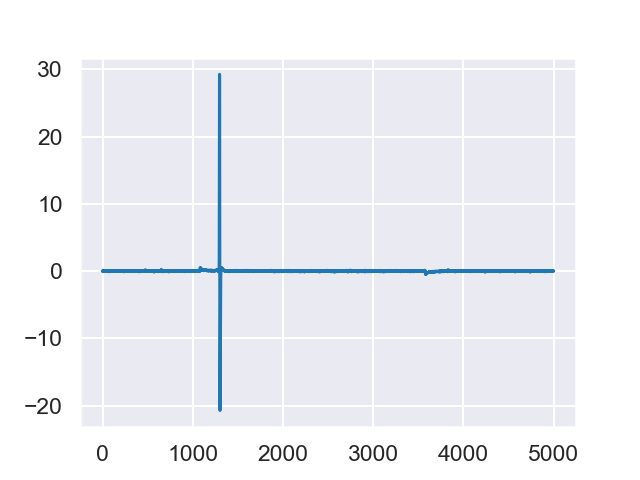

In [299]:
dydx = np.gradient(y,axis = 1)
plt.plot(dydx[1])